In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("/Users/qiuchenlu/Downloads/hw5_treasury yield curve data.csv")
df = df[np.isfinite(df['Adj_Close'])]
df=df.drop(columns=['Date'])

In [2]:
X=df.drop(columns=['Adj_Close'])
y=df.Adj_Close
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


Text(0,0.5,'Frequency')

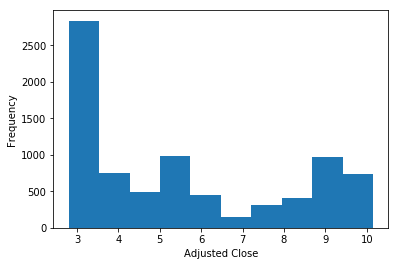

In [3]:
import matplotlib.pyplot as plt
plt.hist(y)
plt.xlabel('Adjusted Close')
plt.ylabel("Frequency")

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_scaled=scaler.fit_transform(X_train)
Xt_scaled=scaler.transform(X_test)


Text(0,0.5,'Percentage Variance Explained')

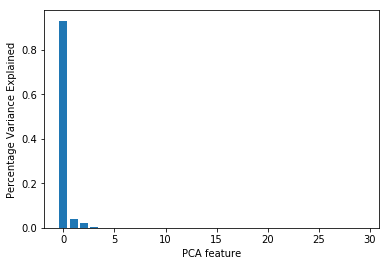

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
scaler = StandardScaler()
cov_mat = np.cov(X_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
pca.fit(X_scaled)
features = range(pca.n_components_)
plt.bar(features, var_exp)
plt.xlabel('PCA feature')
plt.ylabel('Percentage Variance Explained')
# plt.savefig('images/05_02.png', dpi=300)

Text(0,0.5,'Percentage Variance Explained')

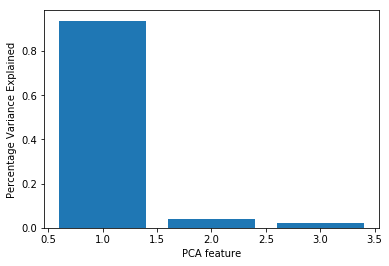

In [7]:
pca = PCA(n_components=3)
scaler = StandardScaler()
pca.fit(X_scaled)
X_scaled_t=pca.transform(X_scaled)
cov_mat = np.cov(X_scaled_t.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

features = range(1,pca.n_components_+1)
plt.bar(features, var_exp)
plt.xlabel('PCA feature')
plt.ylabel('Percentage Variance Explained')

1.0


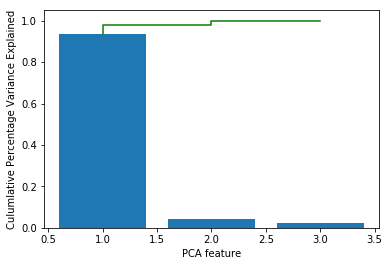

In [8]:
cum_var_exp = np.cumsum(var_exp)
plt.step(features, cum_var_exp,c="green")
plt.bar(features, var_exp)
plt.xlabel('PCA feature')
plt.ylabel('Culumlative Percentage Variance Explained')
print(cum_var_exp[2])

In [9]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_scaled, y_train)
y_pred=reg.predict(Xt_scaled)
R2=r2_score(y_test, y_pred)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred))
print("R2 for test set:")
print(R2)
print("RMSE for test set:")
print(RMSE)
y_pred=reg.predict(X_scaled)
R2=r2_score(y_train, y_pred)
RMSE=math.sqrt(mean_squared_error(y_train, y_pred))
print("R2 for train set:")
print(R2)
print("RMSE for train set:")
print(RMSE)

R2 for test set:
0.904130953533734
RMSE for test set:
0.782369585505725
R2 for train set:
0.9022730353400426
RMSE for train set:
0.7766533040369912


In [10]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(Xt_scaled)

In [11]:
reg = LinearRegression().fit(X_train_pca, y_train)
y_pred=reg.predict(X_test_pca)
R2=r2_score(y_test, y_pred)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred))
print("R2 for test set:")
print(R2)
print("RMSE for test set:")
print(RMSE)
y_pred=reg.predict(X_train_pca)
R2=r2_score(y_train, y_pred)
RMSE=math.sqrt(mean_squared_error(y_train, y_pred))
print("R2 for train set:")
print(R2)
print("RMSE for train set:")
print(RMSE)

R2 for test set:
0.8662415053375473
RMSE for test set:
0.924130792359671
R2 for train set:
0.8672181160186357
RMSE for train set:
0.9052935003366371


In [12]:
from sklearn.svm import SVR
clf = SVR().fit(X_scaled, y_train)
y_pred=clf.predict(Xt_scaled)
R2=r2_score(y_test, y_pred)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred))
print("R2 for test set:")
print(R2)
print("RMSE for test set:")
print(RMSE)
y_pred=clf.predict(X_scaled)
R2=r2_score(y_train, y_pred)
RMSE=math.sqrt(mean_squared_error(y_train, y_pred))
print("R2 for train set:")
print(R2)
print("RMSE for train set:")
print(RMSE)

R2 for test set:
0.989127682416567
RMSE for test set:
0.2634716067608985
R2 for train set:
0.9886507388656196
RMSE for train set:
0.2646694308860057


In [13]:
clf = SVR().fit(X_train_pca, y_train)
y_pred=clf.predict(X_test_pca)
R2=r2_score(y_test, y_pred)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred))
print("R2 for test set:")
print(R2)
print("RMSE for test set:")
print(RMSE)
y_pred=clf.predict(X_train_pca)
R2=r2_score(y_train, y_pred)
RMSE=math.sqrt(mean_squared_error(y_train, y_pred))
print("R2 for train set:")
print(R2)
print("RMSE for train set:")
print(RMSE)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 for test set:
0.9899667356322788
RMSE for test set:
0.253101012737635
R2 for train set:
0.9900739080853601
RMSE for train set:
0.24751933829343323


In [14]:
print("My name is Qiuchen LU")
print("My NetID is: QLU10")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Qiuchen LU
My NetID is: QLU10
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
